Завантаження карти Львова

In [1]:
import osmnx as ox
Lviv_road = ox.graph_from_place("Lviv,Ukraine")

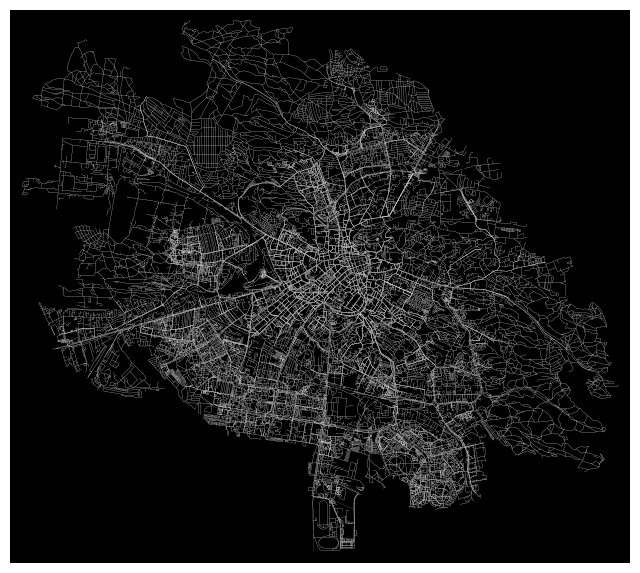

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
ox.plot_graph(Lviv_road,node_size=0, edge_linewidth=0.09, bgcolor='black', edge_color="white",
              show=True)

In [4]:
nodes_lviv, edges_lviv = ox.graph_to_gdfs(Lviv_road)

In [10]:
print("Кількість вузлів у зоні конвертованій у граф: ", len(nodes_lviv))
print("Кількість ребер у зоні конвертованій у графі: ", len(edges_lviv))

Кількість вузлів у зоні конвертованій у граф:  50144
Кількість ребер у зоні конвертованій у графі:  141623


Карта Львівської області для повноти можливих маршрутів

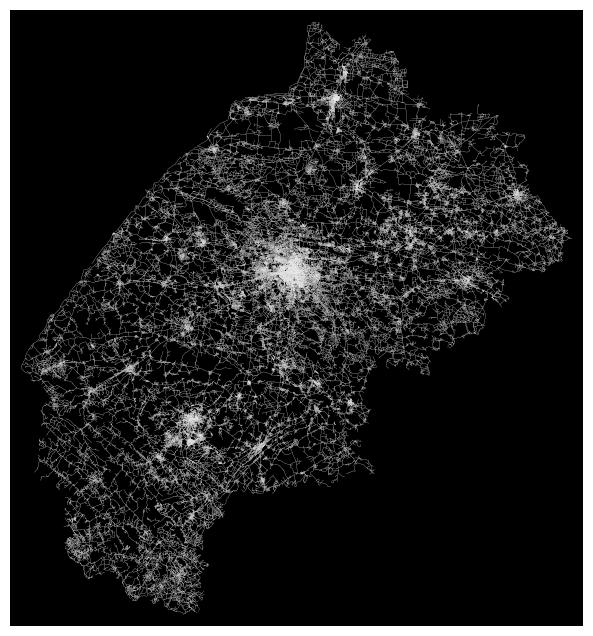

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
import geopandas
import osmnx as ox
import networkx

Lviv_obl = ox.graph_from_place("Lviv Oblast,Ukraine")

ox.plot_graph(Lviv_obl, node_size=0, edge_linewidth=0.09, bgcolor='black',
              edge_color="white", show=True)

In [11]:
nodes_obl, edges_obl = ox.graph_to_gdfs(Lviv_obl)

In [12]:
print("Кількість вузлів у зоні конвертованій у граф: ", len(nodes_obl))
print("Кількість ребер у зоні конвертованій у графі: ", len(edges_obl))

Кількість вузлів у зоні конвертованій у граф:  234992
Кількість ребер у зоні конвертованій у графі:  620639


Дані графа:

In [15]:
nodes, edges = ox.graph_to_gdfs(Lviv_obl)
print("edges info:")
edges.head(5)

edges info:


osmid      highway  oneway reversed   length  \
u         v          key                                                     
251604622 2333375608 0    224517720  residential   False     True  101.777   
          3712589301 0    417552075        trunk   False    False  112.477   
          3712589300 0    417552075        trunk   False     True  134.821   
251604641 251604642  0    363128886        trunk   False     True   50.259   
          2333375837 0    224517733  residential   False    False  237.466   

                         lanes   ref                      name maxspeed  \
u         v          key                                                  
251604622 2333375608 0     NaN   NaN                       NaN      NaN   
          3712589301 0       2  М-06  вулиця Січових Стрільців       40   
          3712589300 0       2  М-06  вулиця Січових Стрільців       40   
251604641 251604642  0       2  М-06  вулиця Данила Галицького       50   
          2333375837 0     NaN   NaN             Зелена вулиця      NaN   

                                                                   geometry  \
u         v          key                                                      
251604622 2333375608 0    LINESTRING (23.58319 49.08787, 23.58450 49.08755)   
          3712589301 0    LINESTRING (23.58319 49.08787, 23.58370 49.08883)   
          3712589300 0    LINESTRING (23.58319 49.08787, 23.58306 49.087...   
251604641 251604642  0    LINESTRING (23.63534 49.10557, 23.63470 49.10541)   
          2333375837 0    LINESTRING (23.63534 49.10557, 23.63551 49.105...   

                         bridge service access tunnel width junction area  
u         v          key                                                   
251604622 2333375608 0      NaN     NaN    NaN    NaN   NaN      NaN  NaN  
          3712589301 0      NaN     NaN    NaN    NaN   NaN      NaN  NaN  
          3712589300 0      NaN     NaN    NaN    NaN   NaN      NaN  NaN  
251604641 251604642  0      NaN     NaN    NaN    NaN   NaN      NaN  NaN  
          2333375837 0      NaN     NaN    NaN    NaN   NaN      NaN  NaN

In [16]:
print("nodes info:")
nodes.head(5)

nodes info:


,y,x,street_count,highway,ref,geometry
osmid,,,,,,
251604622,49.087873,23.583191,3,NaN,NaN,POINT (23.58319 49.08787)
251604641,49.105571,23.635341,4,NaN,NaN,POINT (23.63534 49.10557)
251621077,48.887309,23.252997,3,NaN,NaN,POINT (23.25300 48.88731)
251621101,48.881146,23.285461,3,NaN,NaN,POINT (23.28546 48.88115)
251621172,48.916063,23.301357,3,NaN,NaN,POINT (23.30136 48.91606)


In [17]:
import random
map_points=[(49.80611220996008, 23.97955612862654),
(49.80532285209437, 23.98237781261442),
(49.80478275771747, 23.987291619711186),
(49.8042495817099, 23.99243073217024),
(49.80390336037501, 23.996432588052162),
(49.80395183150313, 23.999769256034998),
(49.80649303590949, 23.999114796958104),
(49.81293216592172, 24.000763128745433),
(49.81766865049101, 24.003570346218133),
(49.823736810282, 24.00771312858426),
(49.82582162024907, 24.00966317414233),
(49.832640701340466, 24.01859487887445),
(49.83680583050842, 24.02202637853643),
(49.840145382636926, 24.027186953530506),
(49.84012073274527, 24.028125056144603),
(49.839253501750214, 24.03253064738627)]


def route_creator(destinations):
    random_long_route=[]
    for i in range(destinations):
        coordinate_number = random.randrange(0, len(map_points))
        destination = map_points[coordinate_number]
        random_long_route.append(destination)
    return random_long_route

Побдуова маршруту за допомогою алгоритму Декйстри для порівняння:

In [18]:
import geopandas
import osmnx as ox
import networkx
import heapq
import time
import matplotlib.pyplot as plt
import heapq
import time
import osmnx as ox

In [19]:
def custom_dijkstra(graph, source, destination):
    pq = []
    heapq.heappush(pq, (0, source))
    distances = {source: 0}
    previous = {}
    
    while pq:
        current_distance, current_node = heapq.heappop(pq)
        
        if current_node == destination:
            break
        
        for neighbor, edge_data in graph[current_node].items():
            distance = current_distance + edge_data[0]['length']
            if neighbor not in distances or distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))
    
    shortest_path = []
    node = destination
    while node in previous:
        shortest_path.append(node)
        node = previous[node]
    shortest_path.append(source)
    shortest_path.reverse()
    
    return shortest_path

def generate_path(graph, points):
    for i in range(len(points)-1):
        source = points[i]
        destination = points[i + 1]
        closest_nodes = ox.distance.nearest_nodes(graph, [source[1], destination[1]], [source[0], destination[0]])
        route = custom_dijkstra(graph, closest_nodes[0], closest_nodes[1])
        total_route_goal.append(route)
    return total_route_goal

In [7]:
stops = [2,4,8,16,64]
for i in range(len(stops)):
    total_route_goal=[]
    target_route = route_creator(stops[i])
    print(len(target_route))
    timer_start = time.time()
    
    total_route = generate_path(Lviv_obl, target_route)

    timer_end = time.time()
    time_total = timer_end - timer_start
    print("time to generate route: " + str(time_total) + " s")

2
time to generate route: 1.728907585144043 s
4
time to generate route: 2.9316389560699463 s
8
time to generate route: 8.626537084579468 s
16
time to generate route: 18.371313095092773 s
64
time to generate route: 74.04400038719177 s


In [78]:
total_route_goal=[]
target_route = route_creator(64)
total_route = generate_path(Lviv_obl, target_route)

In [67]:
width=[]
for i in total_route:
    width.append(0.2)

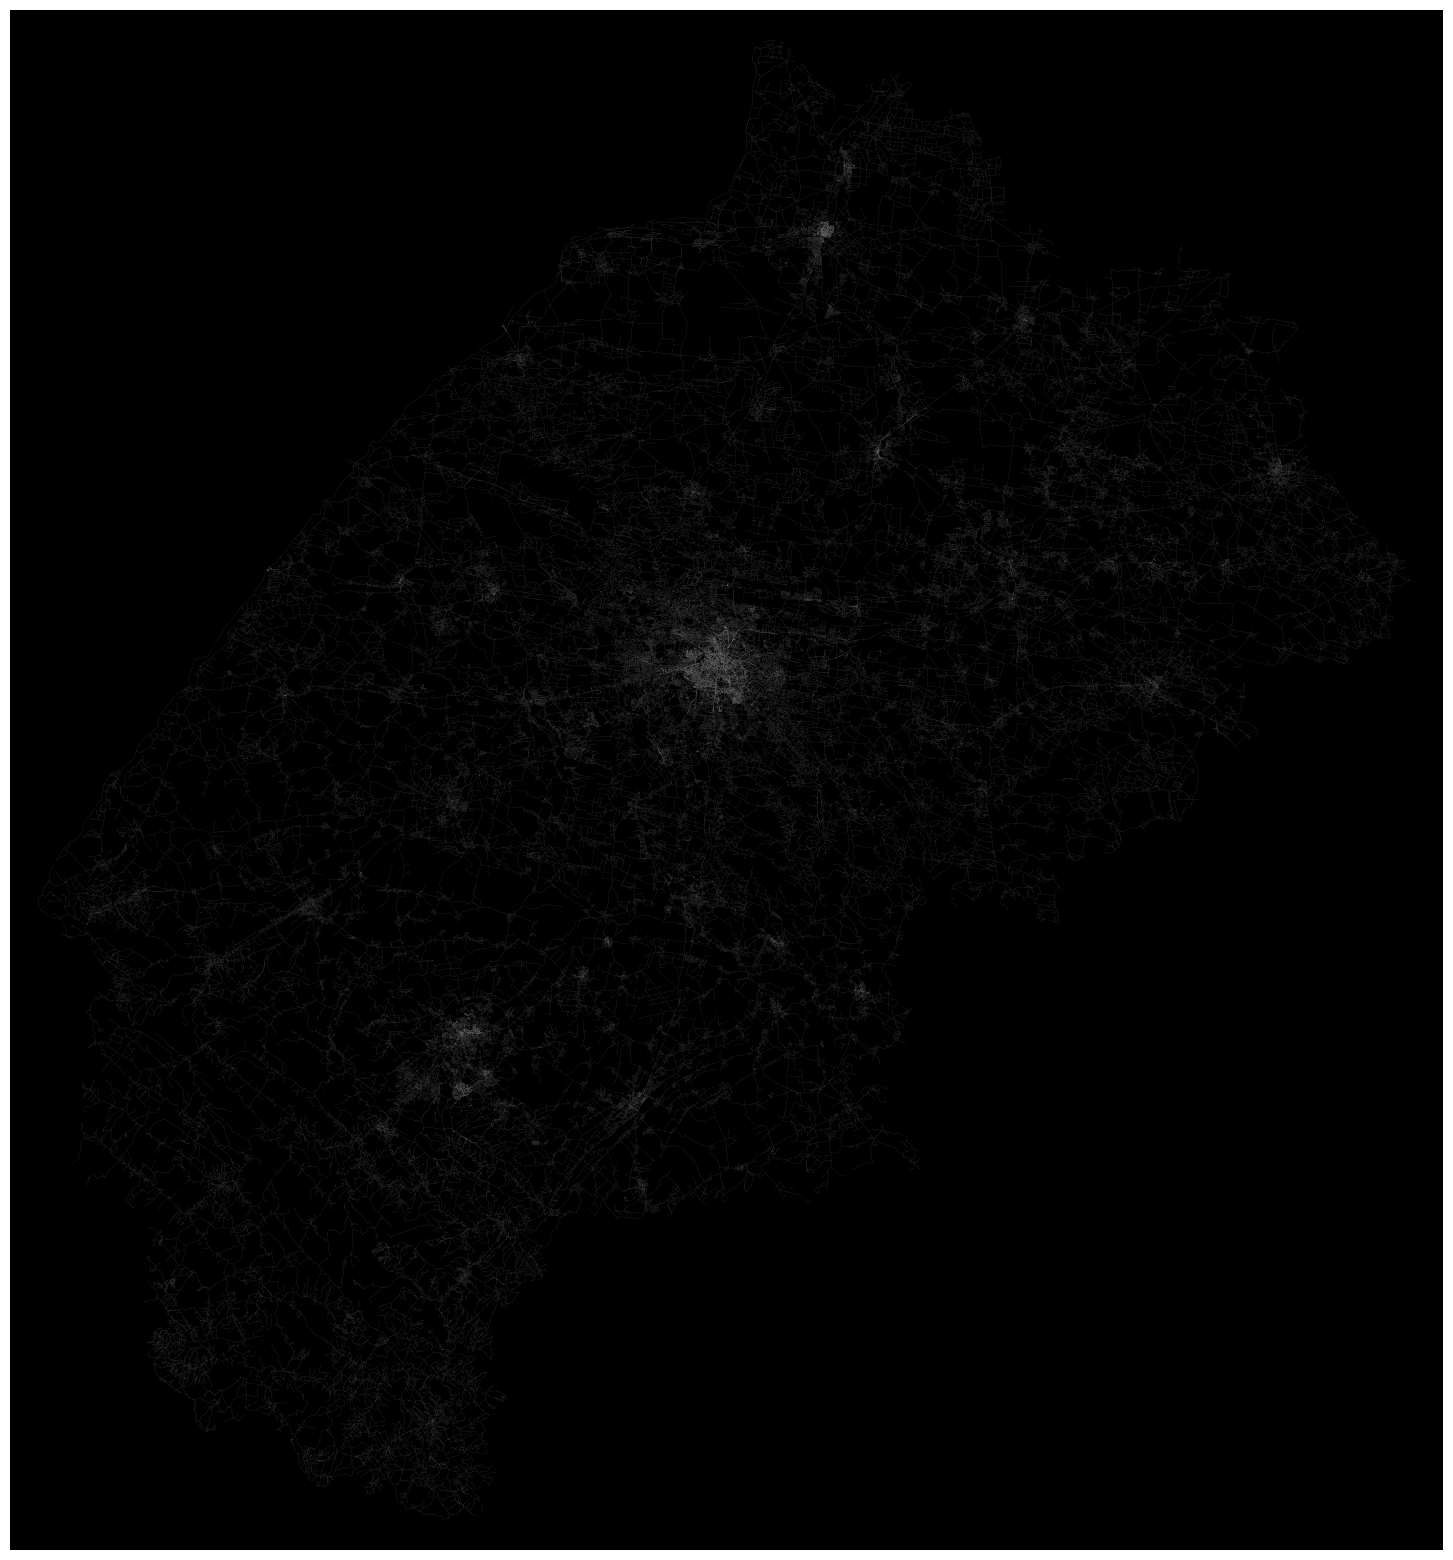

In [79]:
#У випадку множин тоочок(>2), треба міняти на plot_graph_routes
fig1, ax = ox.plot_graph_route(Lviv_obl, *total_route,figsize=(20,20),node_size=0, edge_linewidth=0.02, bgcolor='black', edge_color="white", 
                       show=True, route_linewidth=0.02, route_alpha=1, orig_dest_size=0.03 )

Збереження зображення для його подальшого перегляду:

In [71]:
fig1.savefig('Route64.png', format='png', dpi=2000, bbox_inches='tight')